In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [4]:
laligadf = pd.read_pickle('laligadfmod')
y=laligadf['outcome']
X=laligadf.loc[:, laligadf.columns!='outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.5, 
                                                    shuffle=True, stratify=y)

# Histogram- based Gradient Boosting

In [30]:
boost = HistGradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
boost.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [31]:
param_grid  = [{'max_depth': [list(range(1,20)),None]},
               {'min_samples_leaf': [5,10,15,20,25,30]},
               {'n_estimators': [100,200,300,400,500]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=-1,
                    param_grid=param_grid,
                    scoring='accuracy',)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))           

      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           0.5973            3.23s
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         2           0.4971            3.55s
         1           0.5973            3.55s
         1           0.5973            5.94s
         2           0.4971            2.62s
         3           0.4252            3.15s
         2           0.4971            4.38s
      Iter       Train Loss   Remaining Time 
         4           0.3690            3.15s
         3           0.4252            4.00s
         3           0.4252            3.33s
         4           0.3690            3.28s
      Iter       Train Loss   Remaining Time 
         4           0.3690            2.88s


/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_pre

      Iter       Train Loss   Remaining Time 
         1           0.7096            0.95s
         2           0.6529            0.88s
         3           0.6084            0.91s
         4           0.5755            0.87s
         5           0.5451            0.86s
         6           0.5204            0.86s
         7           0.4991            0.87s
         8           0.4767            0.86s
         9           0.4582            0.86s
        10           0.4397            0.86s
        11           0.4264            0.86s
        12           0.4112            0.85s
        13           0.3914            0.84s
        14           0.3797            0.83s
        15           0.3694            0.82s
        16           0.3582            0.81s
        17           0.3448            0.81s
        18           0.3376            0.80s
        19           0.3280            0.79s
        20           0.3180            0.78s
        21           0.3140            0.77s
        2

In [40]:
boost = GradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
param_grid  = [{'max_depth': [5,10,15,20,None]},
               {'min_samples_leaf': [28,29,30,31,32,33,34,35]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=-1,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))  

      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           0.6670            1.00s
         1           0.6673            1.20s
         1           0.6662            1.42s
         1           0.6667            1.63s
      Iter       Train Loss   Remaining Time 
         1           0.6684            1.87s
         2           0.5959            1.45s
         2           0.5955            1.39s
         2           0.5947            1.39s
         2           0.5938            1.44s
         1           0.6664            1.25s
         2           0.5968            1.67s
         3           0.5415            1.38s
         3           0.5423            1.49s
         3           0.5384            1.49s
         3           0.5409            1.65s
      Iter       Train Loss   Remaining Time 
   

TypeError: float() argument must be a string or a number, not 'dict'

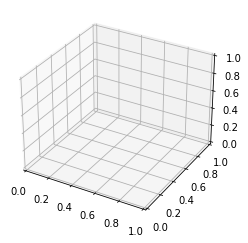

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(param_grid[0],param_grid[1],gs.cv_results_['mean_test_score'])
plt.show()

In [38]:
gs.cv_results_

{'mean_fit_time': array([2.21807041, 3.09819984, 1.82700343, 1.78944821, 1.79254804,
        1.20856261, 1.27128077, 1.41100788, 1.40811338, 1.43559937,
        1.26925039, 1.23348193, 1.04045858]),
 'std_fit_time': array([0.02219427, 0.18378218, 0.1256261 , 0.06723369, 0.07587004,
        0.03613655, 0.02679054, 0.07380212, 0.12610775, 0.02579093,
        0.0845077 , 0.04364035, 0.07026096]),
 'mean_score_time': array([0.01385469, 0.00771284, 0.00610676, 0.01170907, 0.00926781,
        0.00983858, 0.00682588, 0.00665317, 0.01147203, 0.01008406,
        0.01180887, 0.00611534, 0.00475626]),
 'std_score_time': array([0.0025309 , 0.00159873, 0.00148247, 0.00411434, 0.00754184,
        0.0048274 , 0.00295349, 0.00229775, 0.00541153, 0.00363103,
        0.00501379, 0.0027774 , 0.00040726]),
 'param_max_depth': masked_array(data=[5, 10, 15, 20, None, --, --, --, --, --, --, --, --],
              mask=[False, False, False, False, False,  True,  True,  True,
                     True,  True,

#### Surprisingly, 30 had the highest test accuracy.

# Next we will look at Random Forest

In [ ]:
Rforest = RandomForestClassifier(random_state=42,)
boost.get_params().keys()